# 🏭 Product Mix Optimization Problem

A company manufactures two products: **Product A** and **Product B**.

Each product requires a certain amount of **labor hours** and **raw material (in kg)** to produce. The company has limited resources available and wants to maximize profit.

### ➕ Details:

| Resource   | Product A | Product B | Availability |
|------------|-----------|-----------|--------------|
| Labor (hrs)|    2      |    3      | 100 hrs      |
| Material (kg) | 1     |    2      | 80 kg        |

- **Profit per unit of Product A** = ₹40  
- **Profit per unit of Product B** = ₹50

### 🎯 Objective:
Determine how many units of Product A and Product B to produce in order to **maximize total profit**, without exceeding available resources.

### ⚙️ Constraints:
- Labor: 2 × A + 3 × B ≤ 100
- Material: 1 × A + 2 × B ≤ 80
- A, B ≥ 0 and integers

We’ll solve this problem using **Linear Programming (LP)** in Python with the `PuLP` library.


In [1]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, value


In [2]:
# Step 1: Create a linear programming problem instance
model = LpProblem(name="product_mix_optimization", sense=LpMaximize)


In [3]:
# Step 2: Define decision variables
A = LpVariable(name="Product_A_units", lowBound=0, cat='Integer')
B = LpVariable(name="Product_B_units", lowBound=0, cat='Integer')


In [4]:
# Step 3: Define the objective function
model += 40 * A + 50 * B, "Total_Profit"


In [5]:
# Step 4: Add constraints

# Labor constraint: 2A + 3B ≤ 100
model += (2 * A + 3 * B <= 100), "Labor_Constraint"

# Material constraint: 1A + 2B ≤ 80
model += (A + 2 * B <= 80), "Material_Constraint"


In [6]:
# Step 5: Solve the model
model.solve()


1

In [7]:
# Step 6: Output the results
print(f"Status: {LpStatus[model.status]}")
print(f"Produce {A.varValue} units of Product A")
print(f"Produce {B.varValue} units of Product B")
print(f"Maximum Profit: ₹{value(model.objective)}")


Status: Optimal
Produce 50.0 units of Product A
Produce 0.0 units of Product B
Maximum Profit: ₹2000.0


## 💡 Optimization Results & Insights

Based on the model solution:

- ✅ Produce **50.0 units** of **Product A**
- ✅ Produce **0.0 units** of **Product B**
- 💰 The maximum profit achieved is **₹2000.00**

### 📊 Resource Usage:

| Resource   | Used         | Available     |
|------------|--------------|---------------|
| Labor (hrs)| 2×X + 3×Y    | 100 hrs       |
| Material   | 1×X + 2×Y    | 80 kg         |

### 🔍 Insights:
- The company should allocate resources to produce more of the product that gives better profit per resource used.
- The model ensures **none of the constraints are violated** (no overuse of labor or materials).
- This optimization method helps in **data-driven production planning**.


In [8]:
# Calculate resource usage based on the model's solution
labor_used = 2 * A.varValue + 3 * B.varValue
material_used = 1 * A.varValue + 2 * B.varValue

print("📊 Resource Usage Summary:")
print(f"➡️ Labor used: {labor_used} / 100 hours")
print(f"➡️ Material used: {material_used} / 80 kg")


📊 Resource Usage Summary:
➡️ Labor used: 100.0 / 100 hours
➡️ Material used: 50.0 / 80 kg


In [9]:
!pip install matplotlib


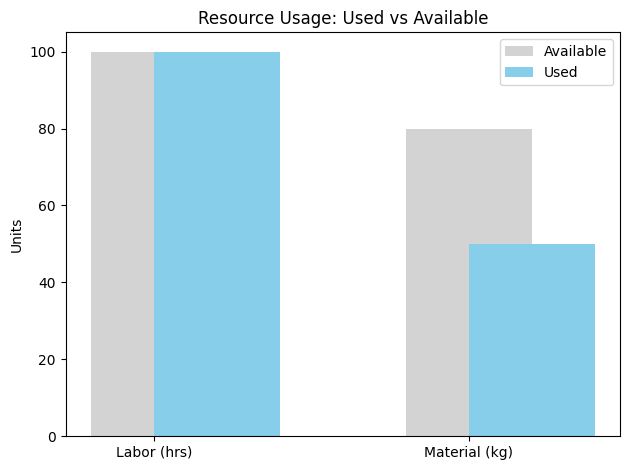

In [10]:
import matplotlib.pyplot as plt

# Resource labels
resources = ['Labor (hrs)', 'Material (kg)']

# Used resource values (from model)
used = [labor_used, material_used]

# Available limits
available = [100, 80]

# Set up position for bars
x = range(len(resources))

# Plot bar chart
plt.bar(x, available, width=0.4, label='Available', align='center', color='lightgray')
plt.bar(x, used, width=0.4, label='Used', align='edge', color='skyblue')

# Formatting
plt.xticks(x, resources)
plt.ylabel("Units")
plt.title("Resource Usage: Used vs Available")
plt.legend()
plt.tight_layout()
plt.show()
